## P-3.55 Perform an experimental analysis of the three algorithms prefix_averagel, prefix-average2, and prefix-average3, from Section 3.3.3. Visualize their running times as a function of the input size with a log-log chart.

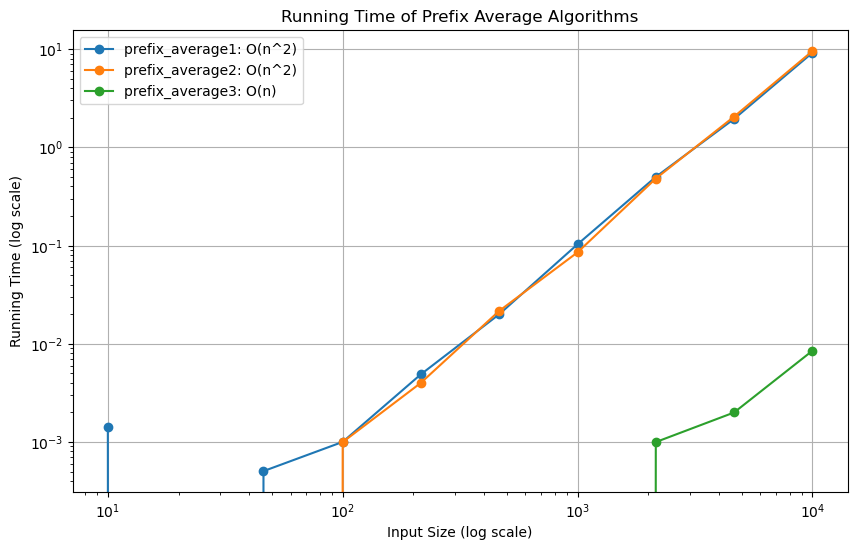

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt

def prefix_average1(S):
    return [sum(S[:j+1]) / (j+1) for j in range(len(S))]

def prefix_average2(S):
    return [sum(S[:j+1]) / (j+1) for j in range(len(S))]

def prefix_average3(S):
    n, total, A = len(S), 0, []
    for j in range(n):
        total += S[j]
        A.append(total / (j + 1))
    return A

input_sizes = np.logspace(1, 4, num=10, dtype=int)
times1, times2, times3 = [], [], []

for n in input_sizes:
    S = np.random.randint(0, 100, n)
    for f, times in zip([prefix_average1, prefix_average2, prefix_average3], [times1, times2, times3]):
        start = time.time()
        f(S)
        times.append(time.time() - start)

##Log-log plot of the results##
plt.figure(figsize=(10, 6))
for times, label in zip([times1, times2, times3], ['prefix_average1: O(n^2)', 'prefix_average2: O(n^2)', 'prefix_average3: O(n)']):
    plt.loglog(input_sizes, times, label=label, marker='o')

plt.title('Running Time of Prefix Average Algorithms')
plt.xlabel('Input Size (log scale)')
plt.ylabel('Running Time (log scale)')
plt.legend()
plt.grid(True)
plt.show()

## P-3.58 For each of the three algorithms, unique1, unique2, and unique3, which solve the element uniqueness problem, perform an experimental analysis to determine the largest value of n such that the given algorithm runs in one minute or less.

In [1]:
import time
import numpy as np

def unique1(S):
    """Return True if there are no duplicate elements in sequence S."""
    for j in range(len(S)):
        for k in range(j + 1, len(S)):
            if S[j] == S[k]:
                return False  
    return True


def unique2(S):
    """Return True if there are no duplicate elements in sequence S."""
    temp = sorted(S)  
    for j in range(1, len(temp)):
        if temp[j - 1] == temp[j]:
            return False  
    return True


def unique3(S, start, stop):
    """Return True if there are no duplicate elements in slice S[start:stop]."""
    if stop - start <= 1: 
        return True  # at most one item
    elif not unique3(S, start, stop - 1): 
        return False  # first part has duplicate
    elif not unique3(S, start + 1, stop): 
        return False  # second part has duplicate
    else: 
        return S[start] != S[stop - 1]  


def max_n_for_unique1():
    max_n = 0
    start = time.time()
    for n in range(1, 100000): 
        S = np.random.randint(0, n, n)  
        unique1(S)  
        end = time.time()
        
        if end - start > 59:  
            break
        max_n = n
    
    print(f'Max n for unique1: {max_n}, Time :', end='')
    print(end - start)


def max_n_for_unique2():
    max_n = 0
    start = time.time()
    for n in range(1, 100000): 
        S = np.random.randint(0, n, n)  
        unique2(S)  
        end = time.time()
        
        if end - start > 59:  
            break
        max_n = n
    
    print(f'Max n for unique2: {max_n}, Time :', end='')
    print(end - start)


def max_n_for_unique3():
    max_n = 0
    prev_total_time = 0
    start = time.time()  
    for n in range(1, 1000):
        S = np.random.randint(0, n, n)  
        
        call_start = time.time()  
        result = unique3(S, 0, n)  
        call_end = time.time()  
        
        elapsed_time = call_end - call_start
        total_time = call_end - start
        
        if total_time > 59:
            print(f'Max n for unique3: {max_n}, Time :', end='')
            print(prev_total_time)
            break
        
        max_n = n
        prev_total_time = total_time

max_n_for_unique1()
max_n_for_unique2()
max_n_for_unique3()

Max n for unique1: 13769, Time :59.01658058166504
Max n for unique2: 13732, Time :59.00758194923401
Max n for unique3: 109, Time :22.965758562088013
